## BME 544 Assignment 1

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import sounddevice as sd
np.random.seed(42)

def play_sound(_vector, fs=5000):
    normalized_vector = np.int16(_vector / np.max(np.abs(_vector)) * 32767)
    sd.play(normalized_vector, fs)
    sd.wait()

#### 1.1.1 Signal 1: Linear Chirp

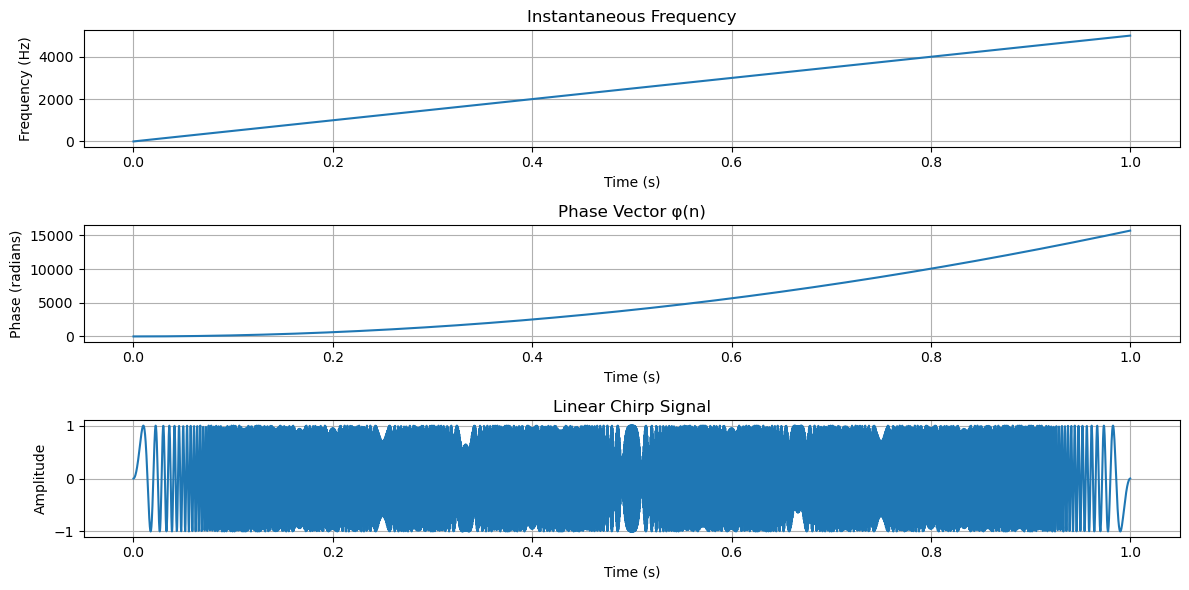

In [13]:
fs = 5000 # Sampling frequency in Hz
T = 1 # Duration in seconds
N = fs * T # Number of samples
f_start = 0 # Start frequency in Hz
f_end = 5000 # End frequency in Hz
phi_0 = 0 # Initial phase in radians
A_n = 1  # Amplitude

n = np.linspace(0, T, int(fs * T), endpoint=False)

f_n = f_start + (f_end - f_start) * n / T  # Linear frequency ramp

phi_n = phi_0 + 2 * np.pi * np.cumsum(f_n) / fs  # Integrating frequency

x_n_linear = A_n * np.sin(phi_n)  # Chirp signal

plt.figure(figsize=(12, 6))
plt.subplot(3, 1, 1)
plt.plot(n, f_n)
plt.title("Instantaneous Frequency")
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.grid()

plt.subplot(3, 1, 2)
plt.plot(n, phi_n)
plt.title("Phase Vector φ(n)")
plt.xlabel("Time (s)")
plt.ylabel("Phase (radians)")
plt.grid()

plt.subplot(3, 1, 3)
plt.plot(n, x_n_linear)
plt.title("Linear Chirp Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid()

plt.tight_layout()
plt.show()

#### 1.1.2 Signal 2: "Interesting" Signal

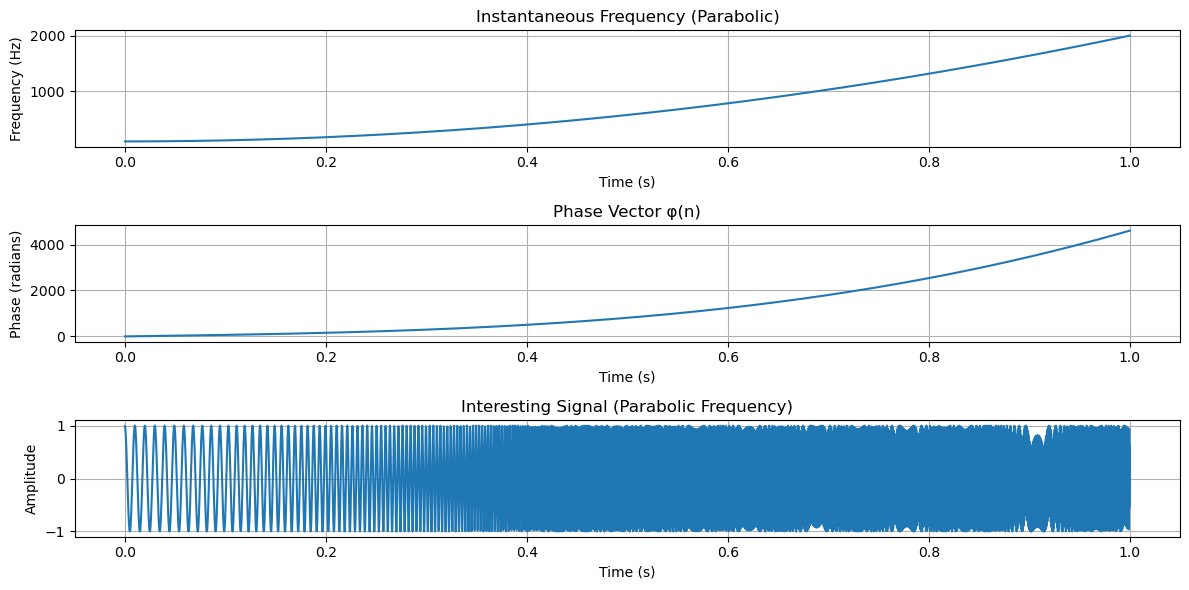

In [14]:
f_min = 100  # Minimum frequency in Hz
f_max = 2000  # Maximum frequency in Hz

# Parabolic frequency ramp
a = (f_max - f_min) / (T**2) # Quadratic component
b = 0 # No linear component
c = f_min # Start frequency

f_n = a * n**2 + b * n + c

phi_n = 2 * np.pi * np.cumsum(f_n) / fs

x_n_interesting = A_n * np.cos(phi_n)  # Signal based on the frequency

plt.figure(figsize=(12, 6))

plt.subplot(3, 1, 1)
plt.plot(n, f_n)
plt.title("Instantaneous Frequency (Parabolic)")
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.grid()

plt.subplot(3, 1, 2)
plt.plot(n, phi_n)
plt.title("Phase Vector φ(n)")
plt.xlabel("Time (s)")
plt.ylabel("Phase (radians)")
plt.grid()

plt.subplot(3, 1, 3)
plt.plot(n, x_n_interesting)
plt.title("Interesting Signal (Parabolic Frequency)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid()

plt.tight_layout()
plt.show()

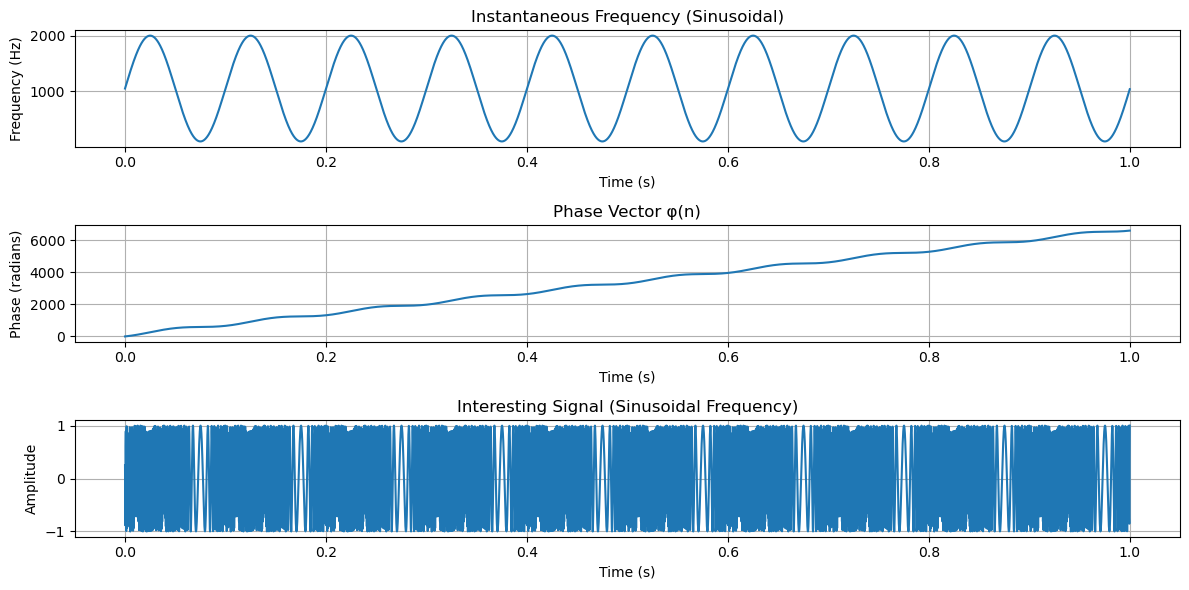

In [15]:
# Sinusoidal instantaneous frequency 
A = (f_max - f_min) / 2 # Amplitude for sine wave
B = 20 * np.pi / T # Frequency of oscillation (once per second)
C = 0 # Phase shift (no initial phase shift)
D = (f_max + f_min) / 2 # Offset to keep frequency in the desired range

f_n = A * np.sin(B * n + C) + D

phi_n = 2 * np.pi * np.cumsum(f_n) / fs

x_n_sinusoidal = A_n * np.cos(phi_n)

plt.figure(figsize=(12, 6))

plt.subplot(3, 1, 1)
plt.plot(n, f_n)
plt.title("Instantaneous Frequency (Sinusoidal)")
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.grid()

plt.subplot(3, 1, 2)
plt.plot(n, phi_n)
plt.title("Phase Vector φ(n)")
plt.xlabel("Time (s)")
plt.ylabel("Phase (radians)")
plt.grid()

plt.subplot(3, 1, 3)
plt.plot(n, x_n_sinusoidal)
plt.title("Interesting Signal (Sinusoidal Frequency)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid()

plt.tight_layout()
plt.show()

play_sound(x_n_sinusoidal)

### 1.2 Power-Law Noises

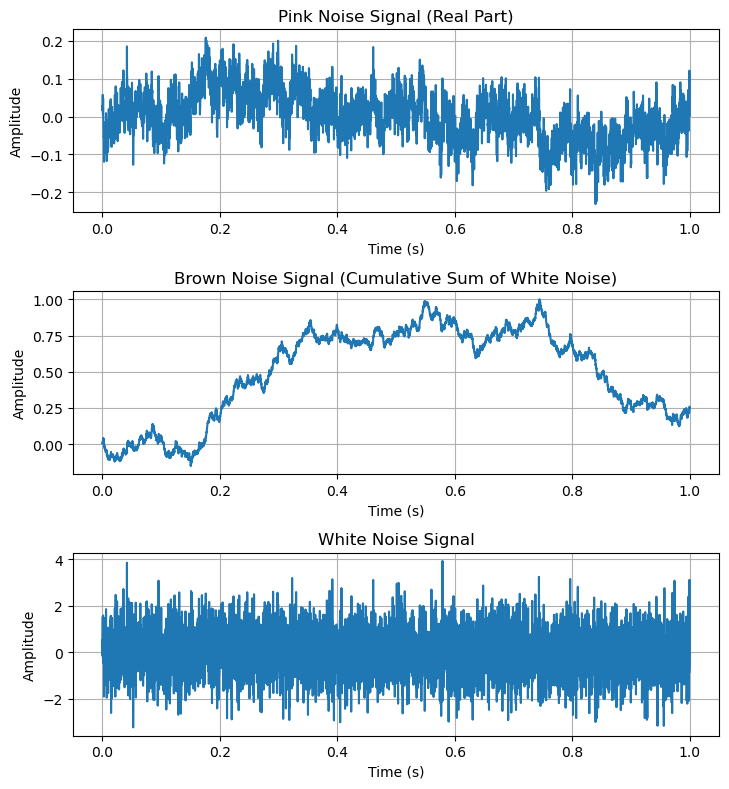

In [16]:
w_n = y_n_white = np.random.randn(N)

W_k = np.fft.fft(w_n)

frequencies = np.fft.fftfreq(N, 1/fs)

M_k = np.zeros_like(frequencies) 

for i, f in enumerate(frequencies):
    if f != 0:
        M_k[i] = 1 / np.sqrt(np.abs(f))  # Take the absolute value of f to avoid negative sqrt

Y_k = W_k * M_k
y_n_pink = np.real(np.fft.ifft(Y_k))
b_n = np.cumsum(w_n)
y_n_brown = b_n / np.max(np.abs(b_n))

plt.figure(figsize=(14, 8))

plt.subplot(3, 2, 1)
plt.plot(n, y_n_pink)
plt.title("Pink Noise Signal (Real Part)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid()

plt.subplot(3, 2, 3)
plt.plot(n, y_n_brown)
plt.title("Brown Noise Signal (Cumulative Sum of White Noise)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid()

plt.subplot(3, 2, 5)
plt.plot(n, y_n_white)
plt.title("White Noise Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid()

plt.tight_layout()
plt.show()

### 1.3 Simulated Recording: Three sinusoids in white noise

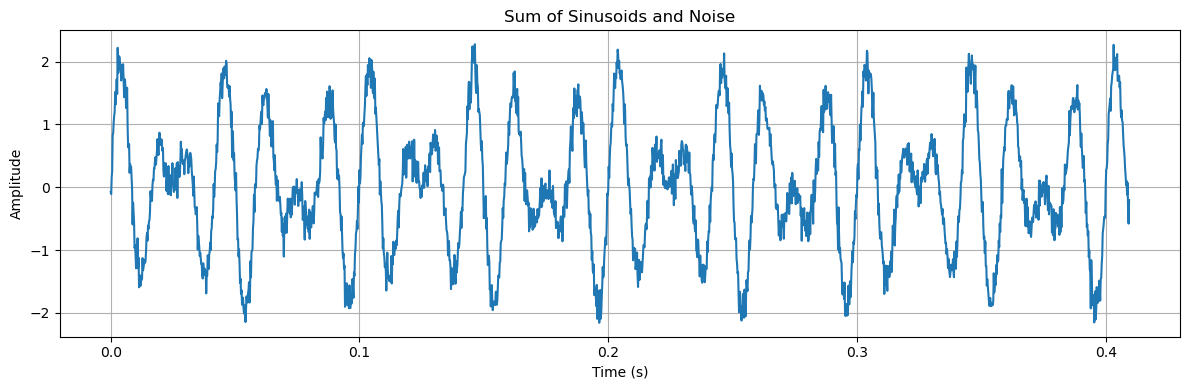

In [25]:
t_n = np.arange(2048) / fs

S1_n = np.sin(2 * np.pi * 50 * t_n)
S2_n = np.sin(2 * np.pi * 70 * t_n)
S3_n = 0.05 * np.sin(2 * np.pi * 125 * t_n)
noise_n = 0.15 * np.random.randn(2048)

resultant_signal = S1_n + S2_n + S3_n + noise_n

plt.figure(figsize=(12, 4))
plt.plot(t_n, resultant_signal)
plt.title("Sum of Sinusoids and Noise")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid()
plt.tight_layout()
plt.show()

### 2.1 Spectrogram of Signal 1: Linear Chirp

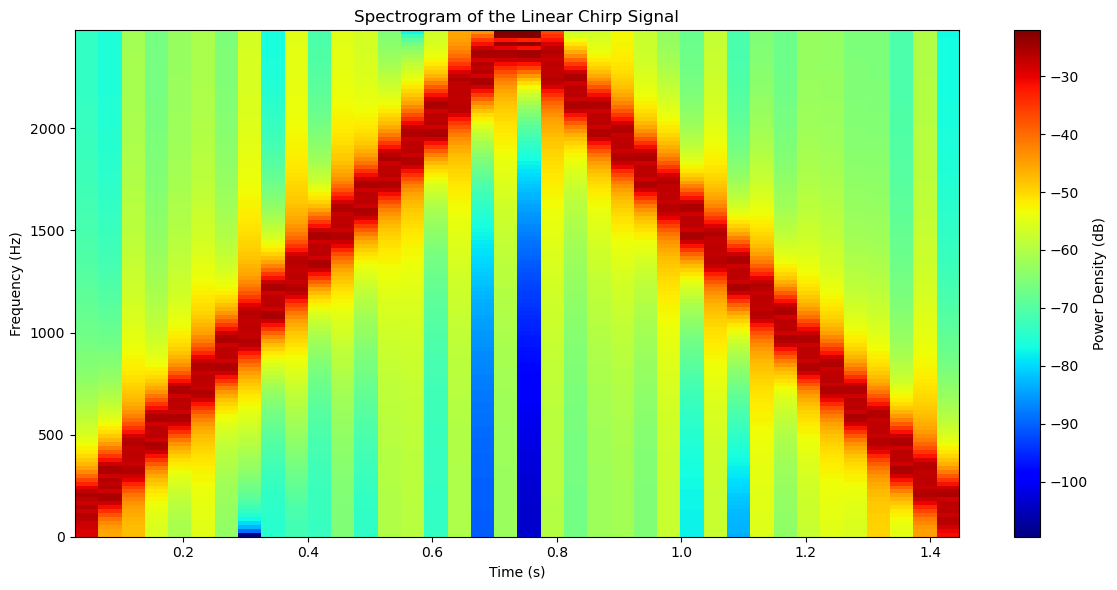

In [18]:
segment_length = 256
overlap = 128

segments = []
for start in range(0, len(x_n_linear) - segment_length + 1, segment_length - overlap):
    segment = x_n_linear[start:start + segment_length]
    segments.append(segment)

segments = np.array(segments)

P_dB = []
tsg = []
fsg = np.fft.fftfreq(segment_length, d=1/fs)[:segment_length // 2]

for idx, segment in enumerate(segments):
    dft = np.fft.fft(segment)
    positive_dft = dft[:segment_length // 2]
    
    magnitude_squared = np.abs(positive_dft) ** 2
    power_density = magnitude_squared / (segment_length * fs / 2)
    power_density_dB = 10 * np.log10(power_density)
    
    P_dB.append(power_density_dB)
    
    start_time = (idx * (segment_length - overlap)) / fs
    end_time = ((idx + 1) * segment_length) / fs
    tsg.append((start_time + end_time) / 2)

P_dB = np.array(P_dB)
tsg = np.array(tsg)

plt.figure(figsize=(12, 6))

plt.imshow(P_dB.T, aspect='auto', origin='lower', cmap='jet', extent=[tsg[0], tsg[-1], fsg[0], fsg[-1]])
plt.colorbar(label="Power Density (dB)")
plt.title("Spectrogram of the Linear Chirp Signal")
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.grid(False)

plt.tight_layout()
plt.show()

### 2.2 Spectrogram of Signal 2: "Interesting" Signal

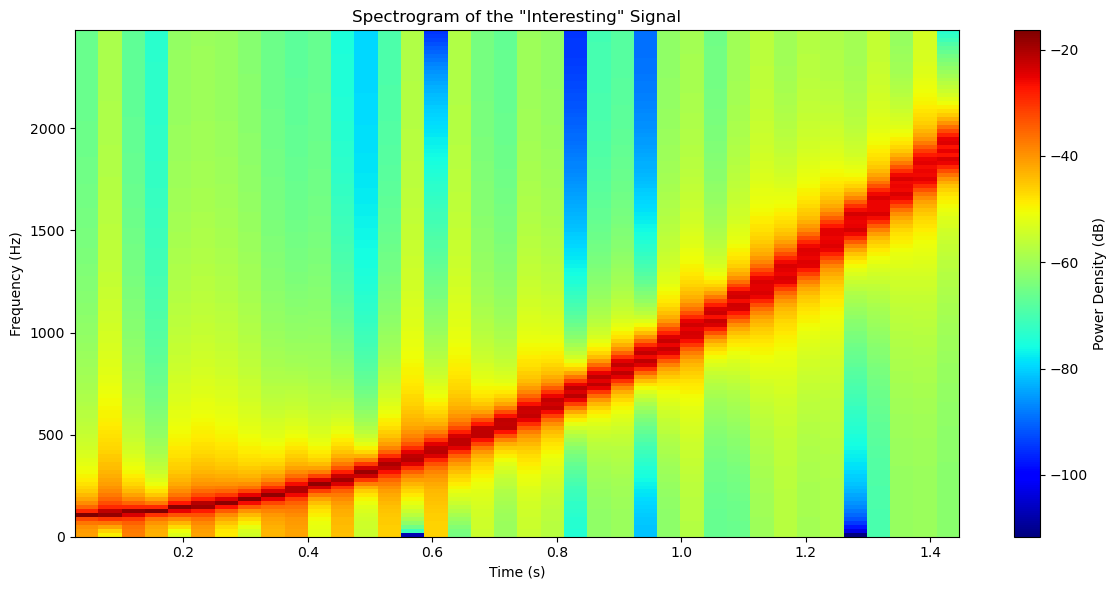

In [19]:
segments = []
for start in range(0, len(x_n_interesting) - segment_length + 1, segment_length - overlap):
    segment = x_n_interesting[start:start + segment_length]
    segments.append(segment)

segments = np.array(segments)

P_dB = []
tsg = []
fsg = np.fft.fftfreq(segment_length, d=1/fs)[:segment_length // 2]

for idx, segment in enumerate(segments):
    dft = np.fft.fft(segment)
    positive_dft = dft[:segment_length // 2]
    
    magnitude_squared = np.abs(positive_dft) ** 2
    power_density = magnitude_squared / (segment_length * fs / 2)
    power_density_dB = 10 * np.log10(power_density)
    
    P_dB.append(power_density_dB)
    
    start_time = (idx * (segment_length - overlap)) / fs
    end_time = ((idx + 1) * segment_length) / fs
    tsg.append((start_time + end_time) / 2)

P_dB = np.array(P_dB)
tsg = np.array(tsg)

plt.figure(figsize=(12, 6))

plt.imshow(P_dB.T, aspect='auto', origin='lower', cmap='jet', extent=[tsg[0], tsg[-1], fsg[0], fsg[-1]])
plt.colorbar(label="Power Density (dB)")
plt.title('Spectrogram of the "Interesting" Signal')
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.grid(False)

plt.tight_layout()
plt.show()

### 2.3 Power spectra of Power-Law Noises

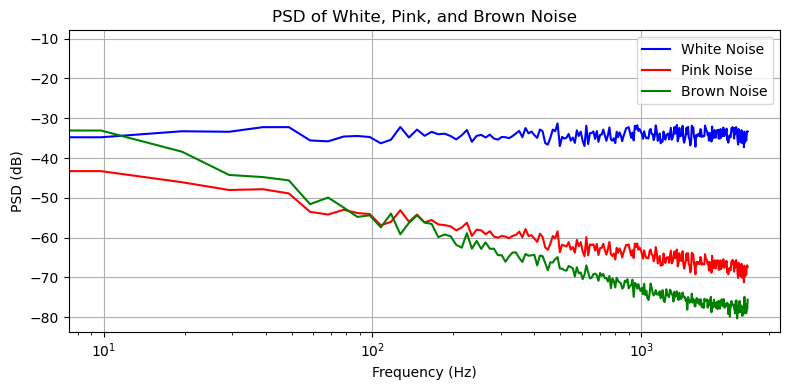

In [27]:
def welch_psd(signal, fs, segment_length, overlap):
    segments = []
    for start in range(0, len(signal) - segment_length + 1, segment_length - overlap):
        segment = signal[start:start + segment_length]
        segments.append(segment)

    segments = np.array(segments)
    
    psd = []
    for segment in segments:
        dft = np.fft.fft(segment)
        positive_dft = dft[:segment_length // 2]
        magnitude_squared = np.abs(positive_dft) ** 2
        psd.append(magnitude_squared)
    
    psd_avg = np.mean(psd, axis=0)

    f = np.fft.fftfreq(segment_length, d=1/fs)[:segment_length // 2]
    
    psd_avg /= (segment_length * fs / 2)
    
    return f, psd_avg

f_white, psd_white = welch_psd(y_n_white, fs, segment_length, overlap)
f_pink, psd_pink = welch_psd(y_n_pink, fs, segment_length, overlap)
f_brown, psd_brown = welch_psd(y_n_brown, fs, segment_length, overlap)

psd_white_dB = 10 * np.log10(psd_white)
psd_pink_dB = 10 * np.log10(psd_pink)
psd_brown_dB = 10 * np.log10(psd_brown)

plt.figure(figsize=(8, 4))
plt.plot(f_white, psd_white_dB, label="White Noise", color='blue')
plt.plot(f_pink, psd_pink_dB, label="Pink Noise", color='red')
plt.plot(f_brown, psd_brown_dB, label="Brown Noise", color='green')
plt.xscale('log')
plt.title("PSD of White, Pink, and Brown Noise")
plt.xlabel("Frequency (Hz)")
plt.ylabel("PSD (dB)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### 2.4 Analysis of Simulated Recording

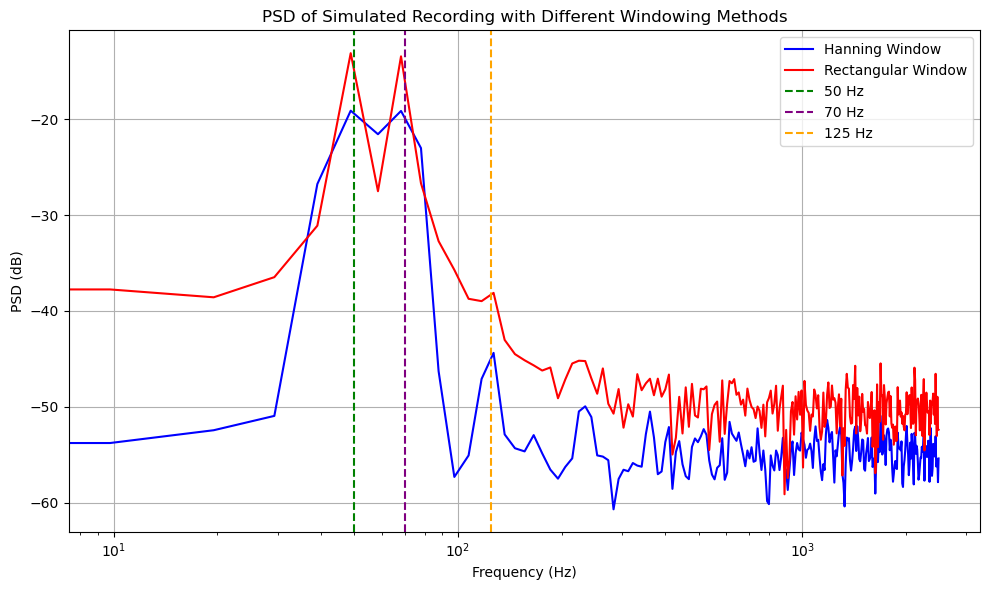

In [21]:
segment_length = 512
overlap = 128

def apply_window(segment, window_type='hanning'):
    if window_type == 'hanning':
        return segment * np.hanning(len(segment))
    elif window_type == 'rectangular':
        return segment

def welch_psd_with_window(signal, fs, segment_length, overlap, window_type='hanning'):
    segments = []
    for start in range(0, len(signal) - segment_length + 1, segment_length - overlap):
        segment = signal[start:start + segment_length]
        segment = apply_window(segment, window_type)
        segments.append(segment)

    segments = np.array(segments)
    
    psd = []
    for segment in segments:
        dft = np.fft.fft(segment)
        positive_dft = dft[:segment_length // 2]
        magnitude_squared = np.abs(positive_dft) ** 2
        psd.append(magnitude_squared)
    
    psd_avg = np.mean(psd, axis=0)

    f = np.fft.fftfreq(segment_length, d=1/fs)[:segment_length // 2]
    
    psd_avg /= (segment_length * fs / 2)
    
    return f, psd_avg

frequencies_hanning, psd_hanning = welch_psd_with_window(resultant_signal, fs, segment_length, overlap, window_type='hanning')
frequencies_rectangular, psd_rectangular = welch_psd_with_window(resultant_signal, fs, segment_length, overlap, window_type='rectangular')

psd_hanning_dB = 10 * np.log10(psd_hanning)
psd_rectangular_dB = 10 * np.log10(psd_rectangular)

plt.figure(figsize=(10, 6))

plt.plot(frequencies_hanning, psd_hanning_dB, label="Hanning Window", color='blue')
plt.plot(frequencies_rectangular, psd_rectangular_dB, label="Rectangular Window", color='red')

vertical_lines = [50, 70, 125]
colors = ['green', 'purple', 'orange']
labels = ['50 Hz', '70 Hz', '125 Hz']

for freq, color, label in zip(vertical_lines, colors, labels):
    plt.axvline(x=freq, color=color, linestyle='--', label=label)

plt.title("PSD of Simulated Recording with Different Windowing Methods")
plt.xlabel("Frequency (Hz)")
plt.ylabel("PSD (dB)")
plt.xscale('log')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### 3 Questions
1. The triangular shape and deviation in the second half of the spectrogram is due to aliasing caused by the insufficient sampling rate. The sampling rate of 5000 Hz is only just enough to represent frequencies up to 2500 Hz correctly, and anything above that causes the higher frequencies to fold back, resulting in the observed distortion. To resolve this, you should increase the sampling rate to at least 10 kHz, or apply an anti-aliasing filter before sampling.
2. When using the Hanning window compared to using a rectangular window, it results in less spectral leakage, which explains the relative magnitude of the 125 Hz compared to its immediate neighbourhood. However, using the Hanning window also results in a decrease in frequency resolution, which is why the peaks of the 50 Hz and 75 Hz components are much less differentiated.
3. 

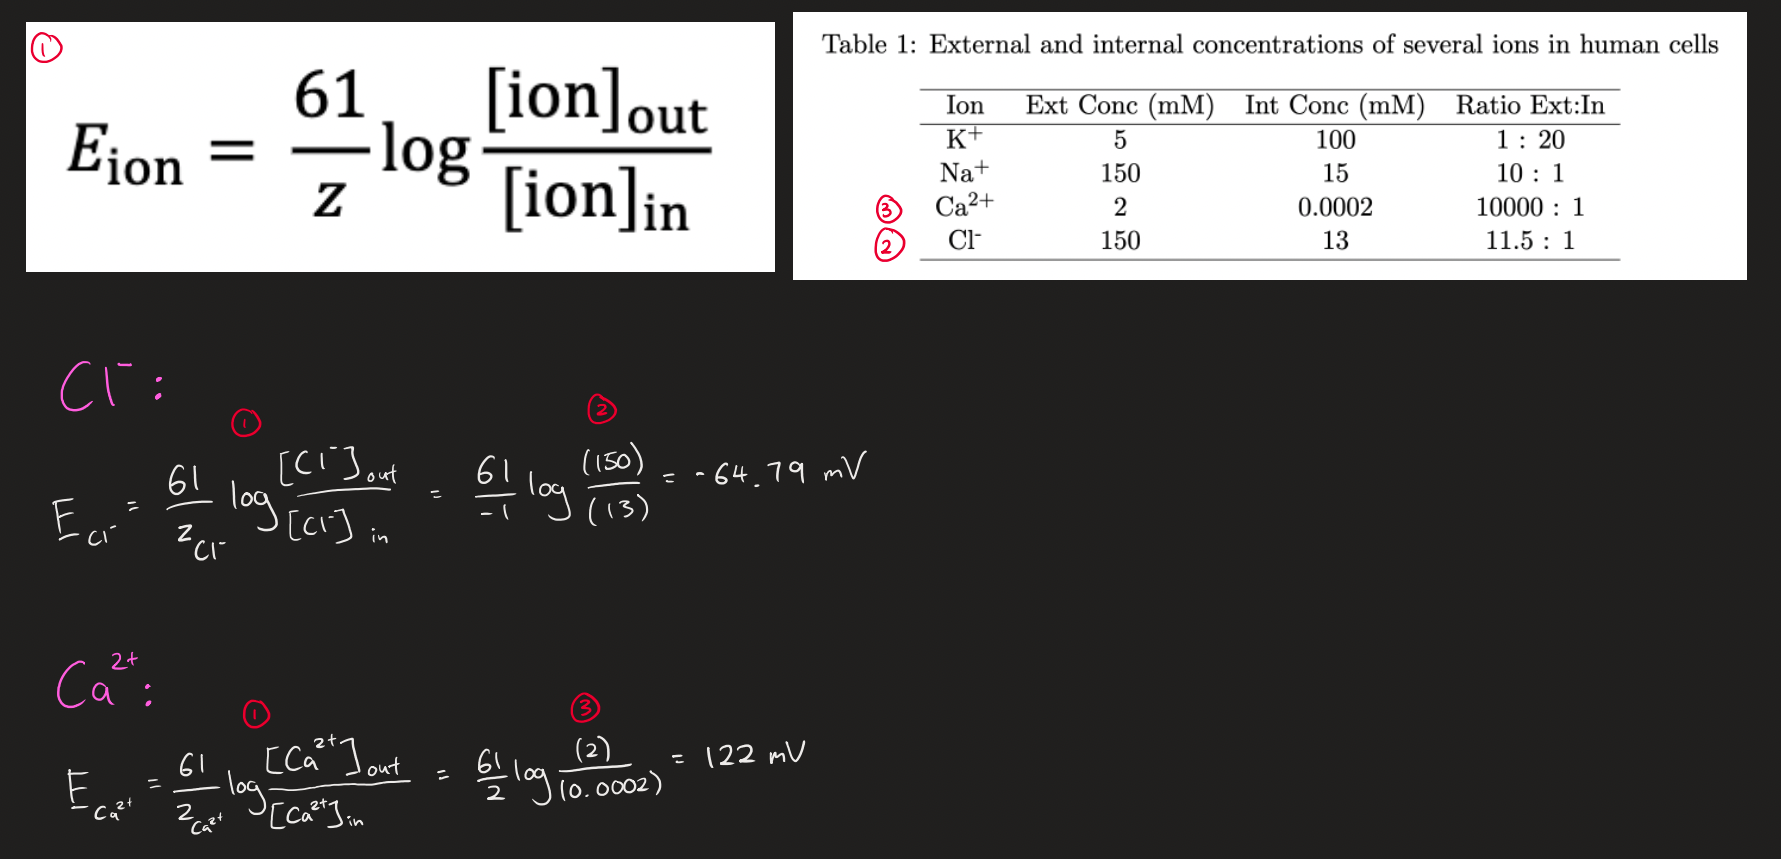